In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr

## 1.前导知识：空值处理

In [2]:
a = pd.DataFrame([np.NaN,1,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,0,0,0])  #NaN帮助我们计算策略信号时非常有用
print(a)
print(a.ffill().fillna(0))  #ffill()向前填充，这里fillna(0)就为了防止NaN没有正常的数
print(a.bfill().fillna(0))  #bfill()向后填充

     0
0  NaN
1  1.0
2  NaN
3  NaN
4  NaN
5  NaN
6  NaN
7  0.0
8  0.0
9  0.0
     0
0  0.0
1  1.0
2  1.0
3  1.0
4  1.0
5  1.0
6  1.0
7  0.0
8  0.0
9  0.0
     0
0  1.0
1  1.0
2  0.0
3  0.0
4  0.0
5  0.0
6  0.0
7  0.0
8  0.0
9  0.0


## 2.数据准备 & 回测准备

In [4]:
data = pdr.get_data_yahoo('^GSPC',start = '2010-01-01', end = '2014-06-30')[['Close']]
data = pd.DataFrame(data)
data.head()

,Close
Date,
2010-01-04,1132.989990
2010-01-05,1136.520020
2010-01-06,1137.140015
2010-01-07,1141.689941
2010-01-08,1144.979980


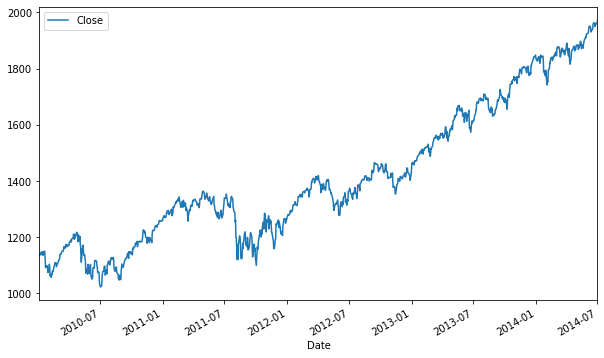

In [5]:
data.plot(figsize = (10,6))
plt.show()

## 3.策略考法思路

In [6]:
data['return'] = np.log(data['Close']/data['Close'].shift(1))
SMA = 80  #我们这里定义了均值，可以随意设定，相当于50天的移动平均
data['SMA'] = data['Close'].rolling(SMA).mean()
data.head(60)

,Close,return,SMA
Date,,,
2010-01-04,1132.989990,NaN,NaN
2010-01-05,1136.520020,0.003111,NaN
2010-01-06,1137.140015,0.000545,NaN
2010-01-07,1141.689941,0.003993,NaN
2010-01-08,1144.979980,0.002878,NaN
2010-01-11,1146.979980,0.001745,NaN
2010-01-12,1136.219971,-0.009425,NaN
2010-01-13,1145.680054,0.008291,NaN
2010-01-14,1148.459961,0.002423,NaN


In [8]:
threshold = 100 
#这个就是我们说的阈值，不同的股票阈值是不同的。我们这里S&P是一个指数，那么阈值可以大一点，但是如果是单支股票那么不能设定这个阈值，因为太大了。
data['distance'] = data['Close'] - data['SMA']

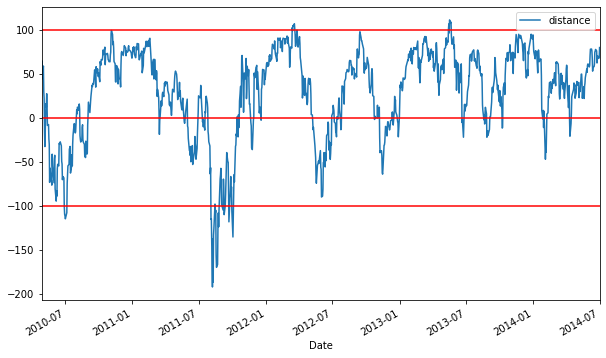

In [9]:
plt.figure()
data['distance'].dropna().plot(figsize = (10,6),legend = True)  #相当于我们把距离画了出来
plt.axhline(threshold, color = 'r')
plt.axhline(-threshold, color = 'r')
plt.axhline(0, color = 'r')
plt.show()  #这里的distance就是close - SMA，如果是超过上轨，那么我们就会认为这个股票不会再涨了而是会开始下跌趋向于均值，那么我们做空。反之做多。

#### 接下来的代码使我们整个策略的核心,算position，也就是我们要给一个信号，到底是做多还是做空

In [10]:
data['position'] = np.where(data['distance'] > threshold,-1,np.nan)  
#这里我们要注意，和前面不同，这里如果distance > threshold那么其实就说明涨的太厉害了，那么我们就准备做空。否则我们就给一个空值，因为是空值我们之后才可以填充。

In [11]:
data['position'] = np.where(data['distance'] < -threshold, 1, data['position'])  
#这里相当于是说，如果distance < threshold那么其实就说明这支股票跌得太厉害了，那么我们预计会回到均值，那么我们做多，给个1.否则，我们就不动任何东西，直接返回它原本的值

#### 前面两个分别讲了什么时候开空仓什么时候开多仓，但是我们还没有解决的一个问题在于，什么时候是平仓。

In [12]:
data['position'] = np.where(data['distance']*data['distance'].shift(1) < 0, 0, data['position'])  

#### 平仓的似乎就是我们的distance - SMA回归到了均值0的时候。而我们采取的思想就是，只要我们看到上一个distance还在0上面下一个就在0下面，那么我们就肯定中间穿过了0线，那么就要平仓了。

In [13]:
data['position'] = data['position'].ffill().fillna(0)  
#ffill()其实就是告诉我们，现在已经给了我们一个持仓还是空仓的交易信号，那么接下来直到下一个平仓信号出现，我们都是要持有当前仓位。
#另外，由于我们开头有很多NaN,所以我们需要用fillna把那些NaN给填充，我们选择的填充是0，那么就相当于不作为，什么都不做。

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


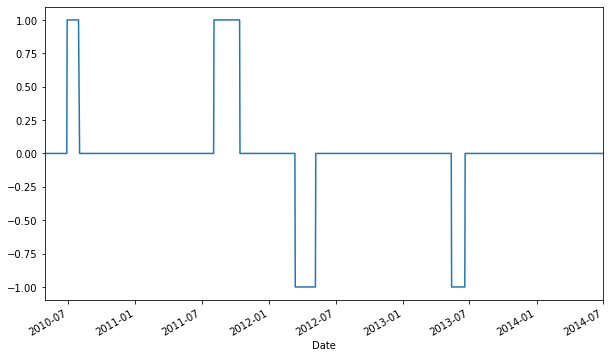

In [14]:
plt.figure()
data['position'].ix[SMA:].plot(ylim = [-1.1,1.1],figsize=(10,6))
plt.show()

#### 我们可以看到刚开始是0，这是因为我们最开始是介于上下之间，所以是0，然后等到我们第一次突破了下轨，那么就说明我们需要做多，那么开始出现1。持有一段时间之后，然后做到回归了均值0，那么就平仓，然后直到再次跳过上下轨。

## 4.计算策略年化收益并可视化

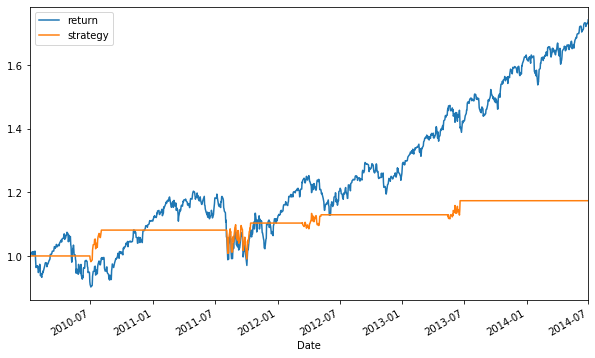

In [15]:
data['strategy'] = data['position'].shift(1)*data['return']
data[['return','strategy']].dropna().cumsum().apply(np.exp).plot(figsize = (10,6))
plt.show()  
#策略表现的不是很好，说明这一段时间可能非常平缓。如果是震荡期间，那么我们的策略就可以跑赢大盘。